In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

License:

# Notebook for getting molecule parameters using RDKIT


In [2]:
import numpy as np
import pandas as pd
import os
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors3D import NPR1, NPR2, PMI1, PMI2, PMI3
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Geometry import rdGeometry
from rdkit.Chem import PyMol
from rdkit import Geometry
import tempfile
import matplotlib.pyplot as plt
%aimport rdkit_functions
%aimport ellipsoid

# Notes:
# Todo:
- timing
 - speed up reading: https://rdkit.blogspot.com/2016/09/avoiding-unnecessary-work-and.html

In [3]:
# molecule file dir
molecule_file = '/home/atarzia/psp/biomin_assays/molecules/molecules.txt'
# output dir
output_dir = '/home/atarzia/psp/biomin_assays/molecules/'

In [4]:
def define_plot_variables(ax, title, ytitle, xtitle, xlim, ylim):
    """
    Series of matplotlib pyplot settings to make all plots unitform.
    """
    # Set number of ticks for x-axis
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.set_ylabel(ytitle, fontsize=16)
    # ax.legend([y, n], ['aligned', 'not aligned'], loc=4, fancybox=True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticklabels(['diffuses', 'does not diffuse'])
    ax.set_xticks([0.25, 0.75])


def define_parity_plot_variables(ax, title, ytitle, xtitle, xlim, ylim):
    """
    Series of matplotlib pyplot settings to make all plots unitform.
    """
    # Set number of ticks for x-axis
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.set_xlabel(xtitle, fontsize=16)
    ax.set_ylabel(ytitle, fontsize=16)
    # ax.legend([y, n], ['aligned', 'not aligned'], loc=4, fancybox=True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [5]:
df, molecules, diameters = rdkit_functions.read_mol_txt_file(molecule_file)
rdkit_functions.produce_quick_fig_mol(molecules, output_dir+'molecules.pdf')

/home/atarzia/psp/biomin_assays/molecules/molecules_1.pdf
/home/atarzia/psp/biomin_assays/molecules/molecules_2.pdf
/home/atarzia/psp/biomin_assays/molecules/molecules_3.pdf


## Calculate size and shape

In [6]:
try:
    v = PyMol.MolViewer()
except ConnectionRefusedError:
    pass

In [7]:
molecules

{'2,6-dichloroindophenol': 'C1=CC(=O)C=CC1=NC2=CC(=C(C(=C2)Cl)O)Cl',
 '2-octanol': 'CCCCCCC(C)O',
 '3-amino-1,2,4-triazole': 'C1=NNC(=N1)N',
 '5-Methylphenazin-5-ium': 'C[N+]1=C2C=CC=CC2=NC3=CC=CC=C31',
 'ABTS': 'CCN1C2=C(C=C(C=C2)S(=O)(=O)[O-])SC1=NN=C3N(C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC',
 'Amplex Red': 'CC(=O)N1C2=C(C=C(C=C2)O)OC3=C1C=CC(=C3)O',
 'D-fructose': 'C1C(C(C(C(O1)(CO)O)O)O)O',
 'D-glucose (chain)': 'C(C(C(C(C(C=O)O)O)O)O)O',
 'D-glucose (ring)': 'C(C1C(C(C(C(O1)O)O)O)O)O',
 'Gluconolactone': 'C(C1C(C(C(C(=O)O1)O)O)O)O',
 'L-fructose': 'C(C(C(C(C(=O)CO)O)O)O)O',
 'L-lactate': 'CC(C(=O)[O-])[O-]',
 'Urea': 'C(=O)(N)N',
 'acetic acid': 'CC(=O)O',
 'ammonia': 'N',
 'butyric acid': 'CCCC(=O)O',
 'carbon dioxide': 'C(=O)=O',
 'decanoic acid': 'CCCCCCCCCC(=O)O',
 'dodecanoic acid': 'CCCCCCCCCCCC(=O)O',
 'gluconic acid': 'C(C(C(C(C(C(=O)O)O)O)O)O)O',
 'hexanoic acid': 'CCCCCC(=O)O',
 'hydrogen peroxide': 'OO',
 'methosulfate': 'COS(=O)(=O)[O-]',
 'methyl ethyl ketone peroxide': '

In [8]:
rdkit_functions.calc_molecule_diameters(molecules, diameters, 
                                        out_dir=output_dir, vdwScale=0.8, boxMargin=4.0,
                                        spacing=0.6, show_vdw=False, plot_ellip=False,
                                        N_conformers=50, 
                                        show_conf=False)

molecule: pyrogallol : SMILES: C1=CC(=C(C(=C1)O)O)O
1 out of 46 done
molecule: purporogallin : SMILES: C1=CC(=O)C(=C2C(=C1)C=C(C(=C2O)O)O)O
2 out of 46 done
molecule: hydrogen peroxide : SMILES: OO
3 out of 46 done
molecule: water : SMILES: O
4 out of 46 done
molecule: oxygen : SMILES: O=O
5 out of 46 done
molecule: ABTS : SMILES: CCN1C2=C(C=C(C=C2)S(=O)(=O)[O-])SC1=NN=C3N(C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC
6 out of 46 done
molecule: 3-amino-1,2,4-triazole : SMILES: C1=NNC(=N1)N
7 out of 46 done
molecule: methosulfate : SMILES: COS(=O)(=O)[O-]
8 out of 46 done
molecule: 5-Methylphenazin-5-ium : SMILES: C[N+]1=C2C=CC=CC2=NC3=CC=CC=C31
9 out of 46 done
molecule: 2,6-dichloroindophenol : SMILES: C1=CC(=O)C=CC1=NC2=CC(=C(C(=C2)Cl)O)Cl
10 out of 46 done
molecule: Gluconolactone : SMILES: C(C1C(C(C(C(=O)O1)O)O)O)O
11 out of 46 done
molecule: Urea : SMILES: C(=O)(N)N
12 out of 46 done
molecule: carbon dioxide : SMILES: C(=O)=O
13 out of 46 done
molecule: ammonia : SMILES: N
14 out of 46 done
m

## Results

In [9]:
threshold = 4.2
diffuse = {}
no_diffuse = {}
for name, smile in molecules.items():
    out_file = output_dir+name+'_diam_result.csv'
    if os.path.isfile(out_file) is False:
        continue
    results = pd.read_csv(out_file)
    min_diam = min(results['diam1'])
    mid_diam = min(results['diam2'])
    # print(min(results['diam1']))
    # print(min(results['diam2']))
    # plt.hist(results['diam1'], facecolor='k', alpha=0.4)
    # plt.hist(results['diam2'], facecolor='r', alpha=0.4)
    if mid_diam <= threshold:
        print(name+':')
        print('can diffuse')
        print('min diameter =', round(min_diam, 3), 'angstrom')
        print('mid diameter =', round(mid_diam, 3), 'angstrom')
        diffuse[name] = smile
    else:
        print(name+':')
        print('cannot diffuse')
        print('min diameter =', round(min_diam, 3), 'angstrom')
        print('mid diameter =', round(mid_diam, 3), 'angstrom')
        no_diffuse[name] = smile
    print('-')

pyrogallol:
cannot diffuse
min diameter = 3.177 angstrom
mid diameter = 7.236 angstrom
-
purporogallin:
cannot diffuse
min diameter = 4.107 angstrom
mid diameter = 8.521 angstrom
-
hydrogen peroxide:
can diffuse
min diameter = 2.791 angstrom
mid diameter = 3.202 angstrom
-
water:
can diffuse
min diameter = 2.492 angstrom
mid diameter = 2.586 angstrom
-
oxygen:
can diffuse
min diameter = 2.841 angstrom
mid diameter = 2.9 angstrom
-
ABTS:
cannot diffuse
min diameter = 6.094 angstrom
mid diameter = 8.834 angstrom
-
3-amino-1,2,4-triazole:
cannot diffuse
min diameter = 3.08 angstrom
mid diameter = 5.189 angstrom
-
methosulfate:
cannot diffuse
min diameter = 4.933 angstrom
mid diameter = 5.33 angstrom
-
5-Methylphenazin-5-ium:
cannot diffuse
min diameter = 3.817 angstrom
mid diameter = 8.297 angstrom
-
2,6-dichloroindophenol:
cannot diffuse
min diameter = 5.866 angstrom
mid diameter = 9.147 angstrom
-
Gluconolactone:
cannot diffuse
min diameter = 4.48 angstrom
mid diameter = 6.832 angstrom


In [12]:
if len(diffuse) > 0:
    rdkit_functions.produce_quick_fig_mol(diffuse, output_dir+'diffuse_mol.pdf', 
                                          labels=False, mpr=5, ims=200)
if len(no_diffuse) > 0:
    rdkit_functions.produce_quick_fig_mol(no_diffuse, output_dir+'no_diffuse_mol.pdf', 
                                          labels=False, mpr=5, ims=200)

/home/atarzia/psp/biomin_assays/molecules/no_diffuse_mol_1.pdf
/home/atarzia/psp/biomin_assays/molecules/no_diffuse_mol_2.pdf
/home/atarzia/psp/biomin_assays/molecules/no_diffuse_mol_3.pdf


## Plot categorical scatter

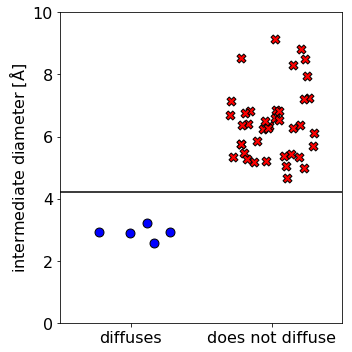

In [10]:
threshold = 4.2
dx = 0.15
fig, ax = plt.subplots(figsize=(5,5))
for name, smile in molecules.items():
    out_file = output_dir+name+'_diam_result.csv'
    if os.path.isfile(out_file) is False:
        continue
    results = pd.read_csv(out_file)
    mid_diam = min(results['diam2'])
    if mid_diam <= threshold:
        C = 'b'
        M = 'o'
        E = 'k'
        D = 0.25
    else:
        C = 'r'
        M = 'X'
        E = 'k'
        D = 0.75
    ax.scatter(D+(dx*(np.random.random() - 0.5) * 2),
               mid_diam, c=C, 
               edgecolors=E, marker=M, alpha=1.0,
               s=80)
    
ax.axhline(y=threshold, c='k')
define_plot_variables(ax,
                      title='',
                      xtitle='',
                      ytitle='intermediate diameter [$\mathrm{\AA}$]',
                      xlim=(0, 1),
                      ylim=(0, 10))
fig.tight_layout()
fig.savefig(output_dir+"categorical.pdf", dpi=720,
            bbox_inches='tight')

## Plot Shapes

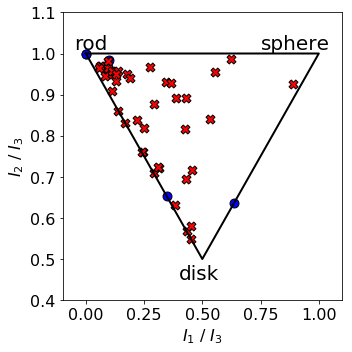

In [11]:
threshold = 4.2
fig, ax = plt.subplots(figsize=(5,5))
for name, smile in molecules.items():
    out_file = output_dir+name+'_diam_result.csv'
    if os.path.isfile(out_file) is False:
        continue
    results = pd.read_csv(out_file)
    mid_diam = min(results['diam2'])
    if mid_diam <= threshold:
        C = 'b'
        M = 'o'
        E = 'k'
        D = 0.25
    else:
        C = 'r'
        M = 'X'
        E = 'k'
        D = 0.75
    ax.scatter(np.average(results['ratio_1']),
               np.average(results['ratio_2']),
               c=C, 
               edgecolors=E, marker=M, alpha=1.0,
               s=80)
    
ax.plot([0, 0.5, 1, 0], [1, 0.5, 1, 1], c='k', lw=2)
ax.text(0.75, 1.01, 'sphere', fontsize=20)
ax.text(0.4, 0.45, 'disk', fontsize=20)
ax.text(-0.05, 1.01, 'rod', fontsize=20)
define_parity_plot_variables(ax,
                             title='',
                             xtitle='$I_1$ / $I_3$',
                             ytitle='$I_2$ / $I_3$',
                             xlim=(-0.1, 1.1),
                             ylim=(0.4, 1.1))
fig.tight_layout()
fig.savefig(output_dir+"shape.pdf", dpi=720,
            bbox_inches='tight')

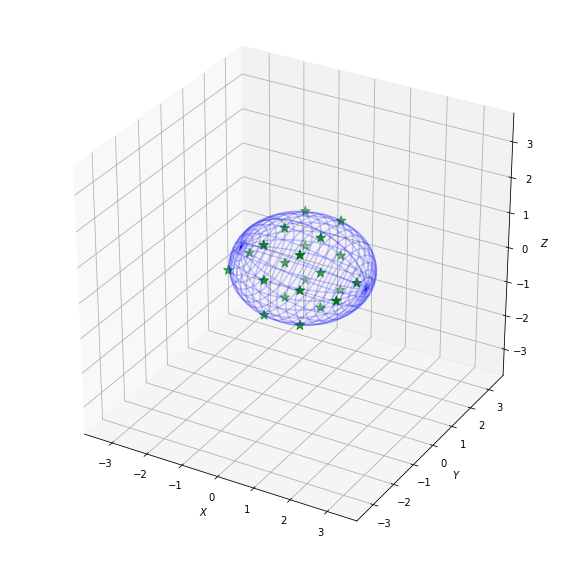

In [9]:
conf_diameters, conf_axes, conf_moments = rdkit_functions.get_ellip_diameters(mol, cids, 
                                                                    vdwScale=1.0, 
                                                                    boxMargin=4.0, 
                                                                    spacing=1.0,
                                                                    show=False, 
                                                                    plot=True)
        

(0, 10)

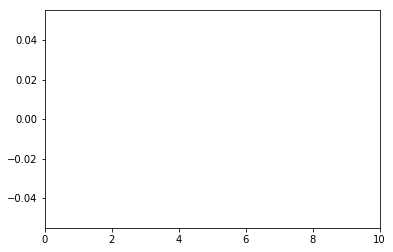

In [100]:
plt.hist(min_diam_sums, facecolor='k', alpha=0.4)
plt.hist(mid_diam_sums, facecolor='r', alpha=0.4)
plt.hist(avg_diam_sums, facecolor='b', alpha=0.4)
plt.xlim(0, 10)